# Discussion Section Week 1 - 4/11/24

## Before you Start Download these Files

Make sure to download these 4 pcaps to reference during this lab.  
[speedtest_short_range.pcap](https://drive.google.com/file/d/1W_FyI7vvRDZegpIXgwNJSTuqZjTi6Tkz/view?usp=drive_link)  
[speedtest_long_range.pcap](https://drive.google.com/file/d/1uzl1WZ4ZvlTCZ8hQnKHiAnyW6sqlH-Mp/view?usp=drive_link)  
[short_range_wlan.pcap](https://drive.google.com/file/d/1r0qQn2qSwoOjKopOCLHjDh0w22CvsK-W/view?usp=drive_link)   
[long_range_wlan.pcap](https://drive.google.com/file/d/1jmIcmvjskSUTCAEApleaOSRzKbzWIcjI/view?usp=drive_link)   

## Wireshark Recap

Wireshark is an open-source network protocol analyzer widely used for network troubleshooting, analysis, software and protocol development, and education. It captures packets in real-time and displays them in as much detail as possible. This tool is essential for understanding what is happening on a network at a microscopic level. Wireshark is particularly useful in network analysis because it provides the capability to see the smallest details of network activities. This visibility makes it an invaluable tool for diagnosing network problems, ensuring network security, verifying network applications, and learning about network protocol internals. We will be using Wireshark throughout this course as a way for understanding how new protocols work in practice, and eventually for extracting packet level information for measuring Quality of Service (QoS) and inferring Quality of Experience (QoE) by the end of the quarter.

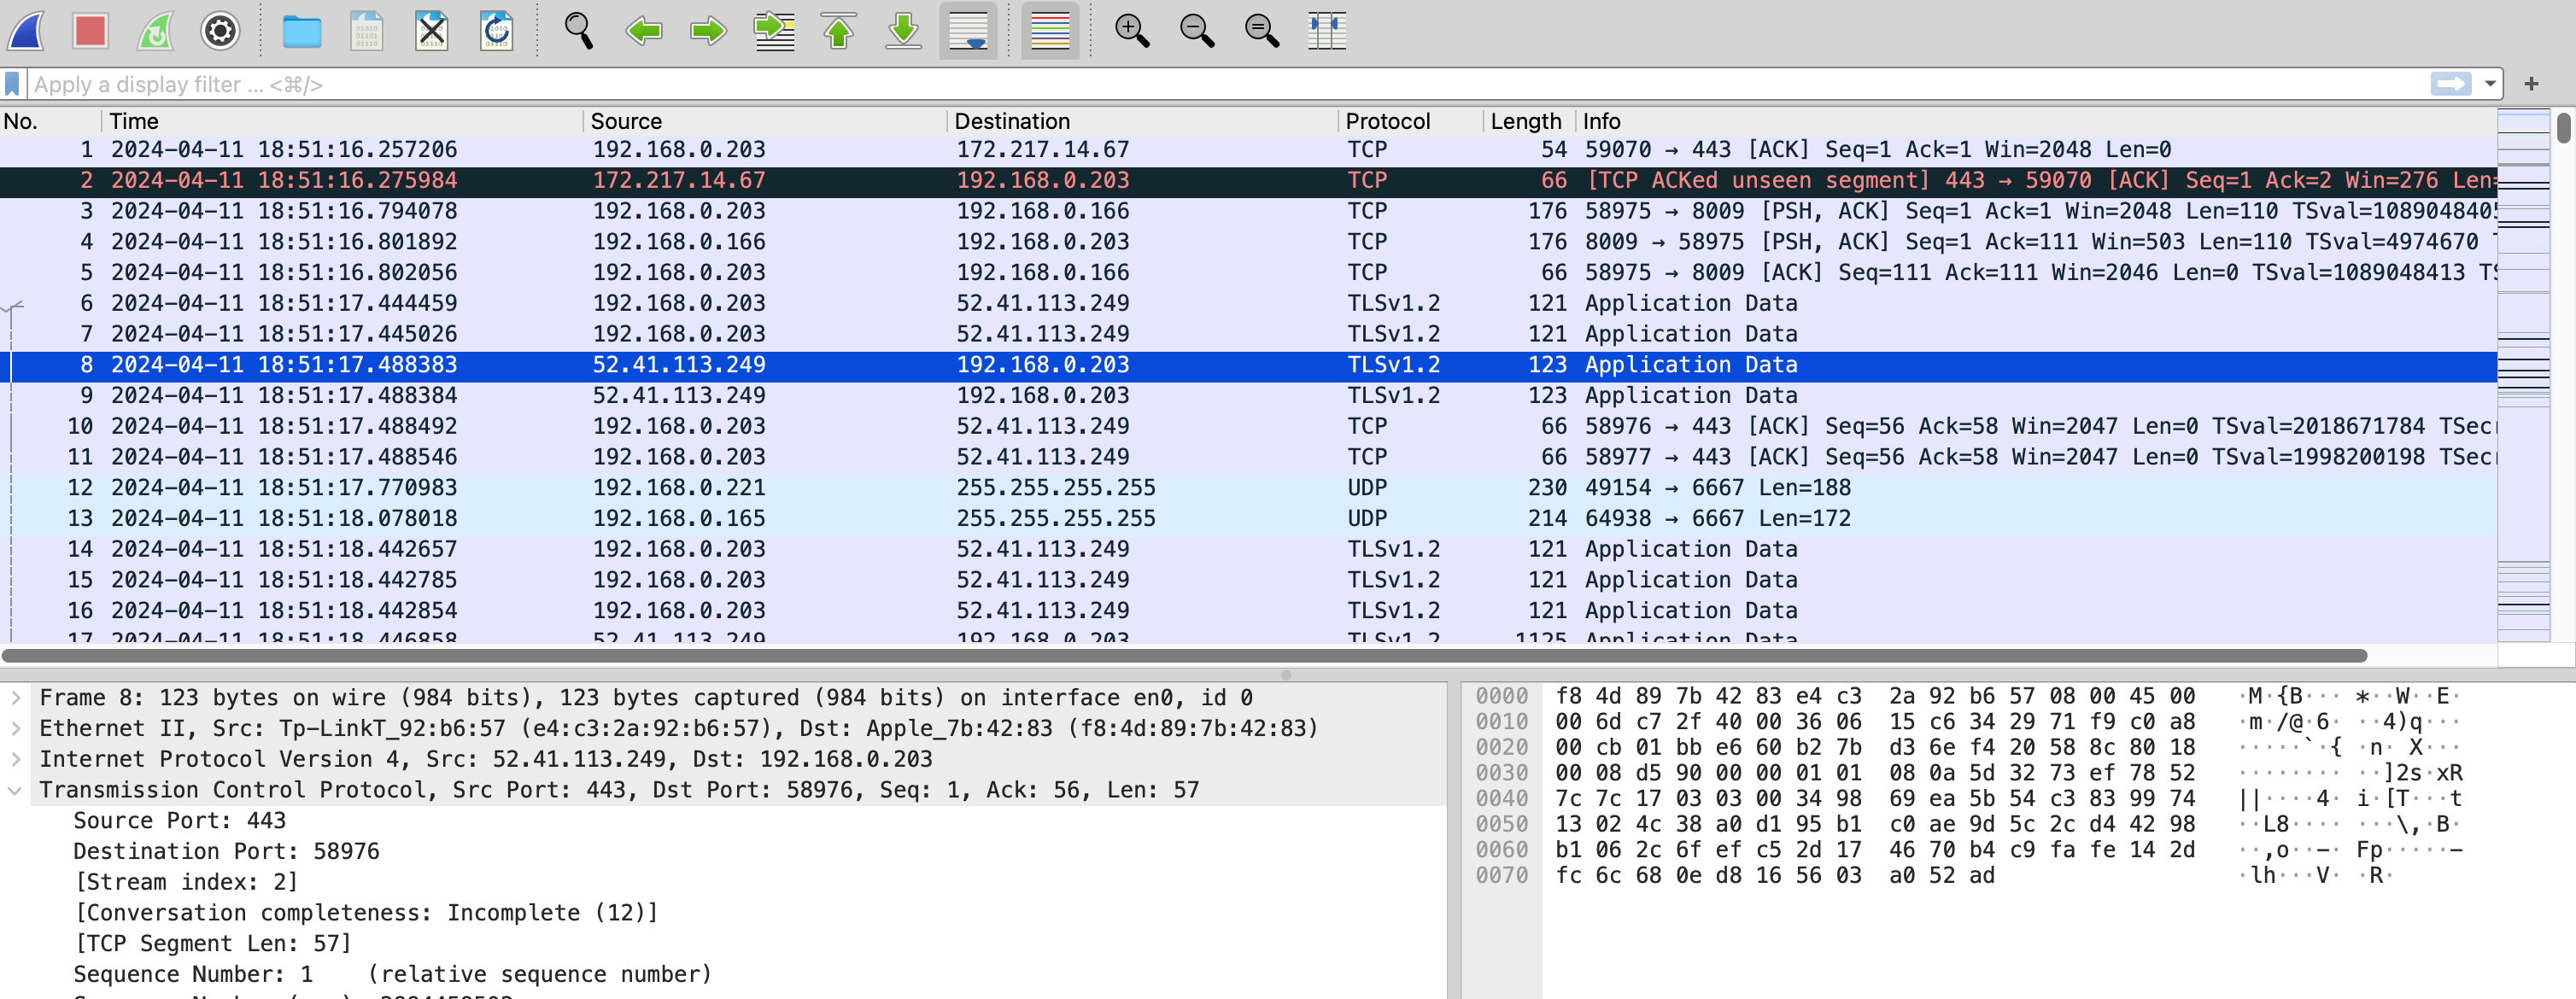

### How to dissect a packet?
- Click on a row and you can see the raw packet bits in the bottom-right pane
- In the bottom-left pane, you can see the headers and their values organized by different layers in the packet

### How to compose filters?
- We can construct flexible filters in wireshark using different headers
- Examples of some filters
    - "udp"
        - The filter above shows packets with a UDP header
    - "tcp.dstport == 80"
        - Filter for outbound HTTP traffic
    - "tcp.dstport == 80 and tcp.srcport == 4343"
        - Filter for outbound HTTP traffic originating at port 4343
- To construct filter with header fields, we need their wireshark names. The list of all protocols and their fields can be found at this [link](https://www.wireshark.org/docs/dfref/).
- You can also know the field name by opening up a packet, and clicking the header field in that packet. The field name will be visible in the bottom-left corner.

### Analyzing an Ookla Speed Test

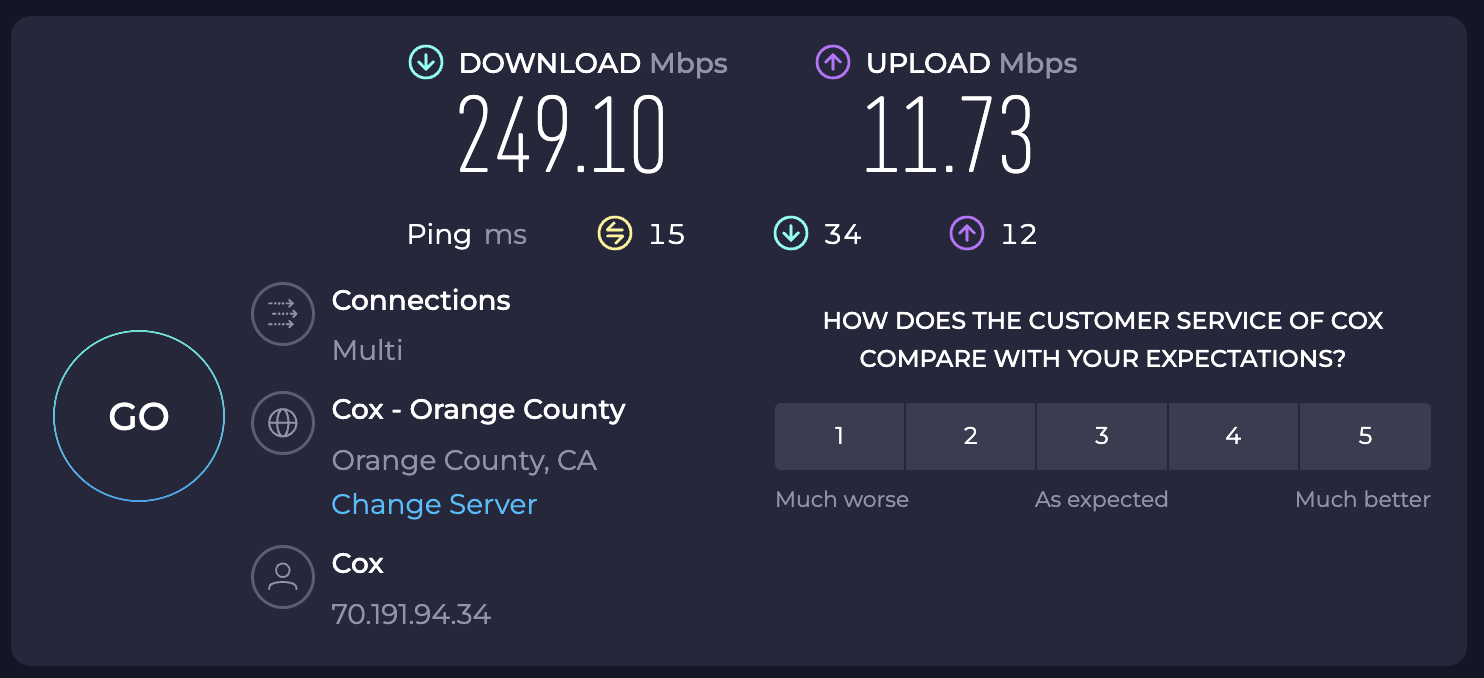

This [speedtest](speedtest.net) was run on a laptop connected wirelessly to its local access point (AP) about 20 feet away from the AP. The speedtest was able to achieve a download speed of 250 Mbps. While the speedtest was running, wireshark was run on the same host producing [speedtest_short_range.pcap](https://drive.google.com/file/d/1W_FyI7vvRDZegpIXgwNJSTuqZjTi6Tkz/view?usp=drive_link). Download and open the packet capture with Wireshark and try to answer the following questions.
- What is the IP of the client host running the speedtest?
- What is the IP of the server(s) that are being used for the speedtest?
- What is the MAC address of the client host?
- What is MAC address of the next-hop gateway from the client host?
- What does the MAC address of the next-hop gateway represent?
- How many TCP packets are sent total between the client host and speedtest servers?
- How many packets are retransmitted in the TCP connections during the speedtest?
- What is the retransmission rate for the TCP packets between the client and server during the speedtest?

In [ ]:
%load ./review1-answers.txt

### Analyzing Ookla Speed Test (Long Range)

Now we will look at a second [speedtest](speedtest.net) that was run on the same laptop about 100 feet away from the AP. The speedtest was able to achieve a download speed of 25 Mbps. While the speedtest was running, wireshark was run on the same host producing [speedtest_long_range.pcap](https://drive.google.com/file/d/1uzl1WZ4ZvlTCZ8hQnKHiAnyW6sqlH-Mp/view?usp=drive_link). Download and open the packet capture with Wireshark and try to answer the following questions.
- What is the IP of the server(s) that are being used for the speedtest?
- How many TCP packets are sent total between the client host and speedtest servers?
- How many packets are retransmitted in the TCP connections during the speedtest?
- What is the retransmission rate for the TCP packets between the client and server during the speedtest?
- What is the relationship between distance vs. signal strength and distance vs. loss over wireless?

In [ ]:
%load ./review2-answers.txt

## Inspecting 802.11 Frames

Wireshark, when utilized in monitor mode, can serve as a tool for capturing and analyzing 802.11 wireless frames. In monitor mode, Wireshark can listen to all traffic on a wireless network channel, not just the communication involving the host device. This capability is crucial for examining interactions of wireless protocols at the frame level, including management frames, control frames, and data frames. Students can observe real-time network operations such as association, authentication, and handshaking processes. 

### Wireless Protocol Review

The 802.11 wireless protocol defines several types of frames, primarily categorized into three groups: management frames, control frames, and data frames.  

Management frames are crucial for establishing and maintaining communication between devices. Examples include Beacon frames, Association Request/Response frames, Authentication frames, and Deauthentication frames. 
    - Beacon frames are sent out periodically by the AP
    - Probe request / response are used by client to scan area for available APs
    - Association request/response, Auth, Deauth, Disassocation (check out this [link](https://documentation.meraki.com/MR/WiFi_Basics_and_Best_Practices/802.11_Association_Process_Explained))

Control frames help in the delivery of data frames by managing the access to the air medium. Examples are ACK (Acknowledgment), RTS (Request to Send), and CTS (Clear to Send) frames. They are used for maintaining order and ensuring successful data transmission between devices. 

Data frames are used for sending data between the client and AP involving keys/keep-alives or protocol-specific information.

#### 802.11 MAC Addresses
Address 1: Receiver Address  
Address 2: Transmitter Address  
Address 3: Destination Address  
Address 4: Source Address  

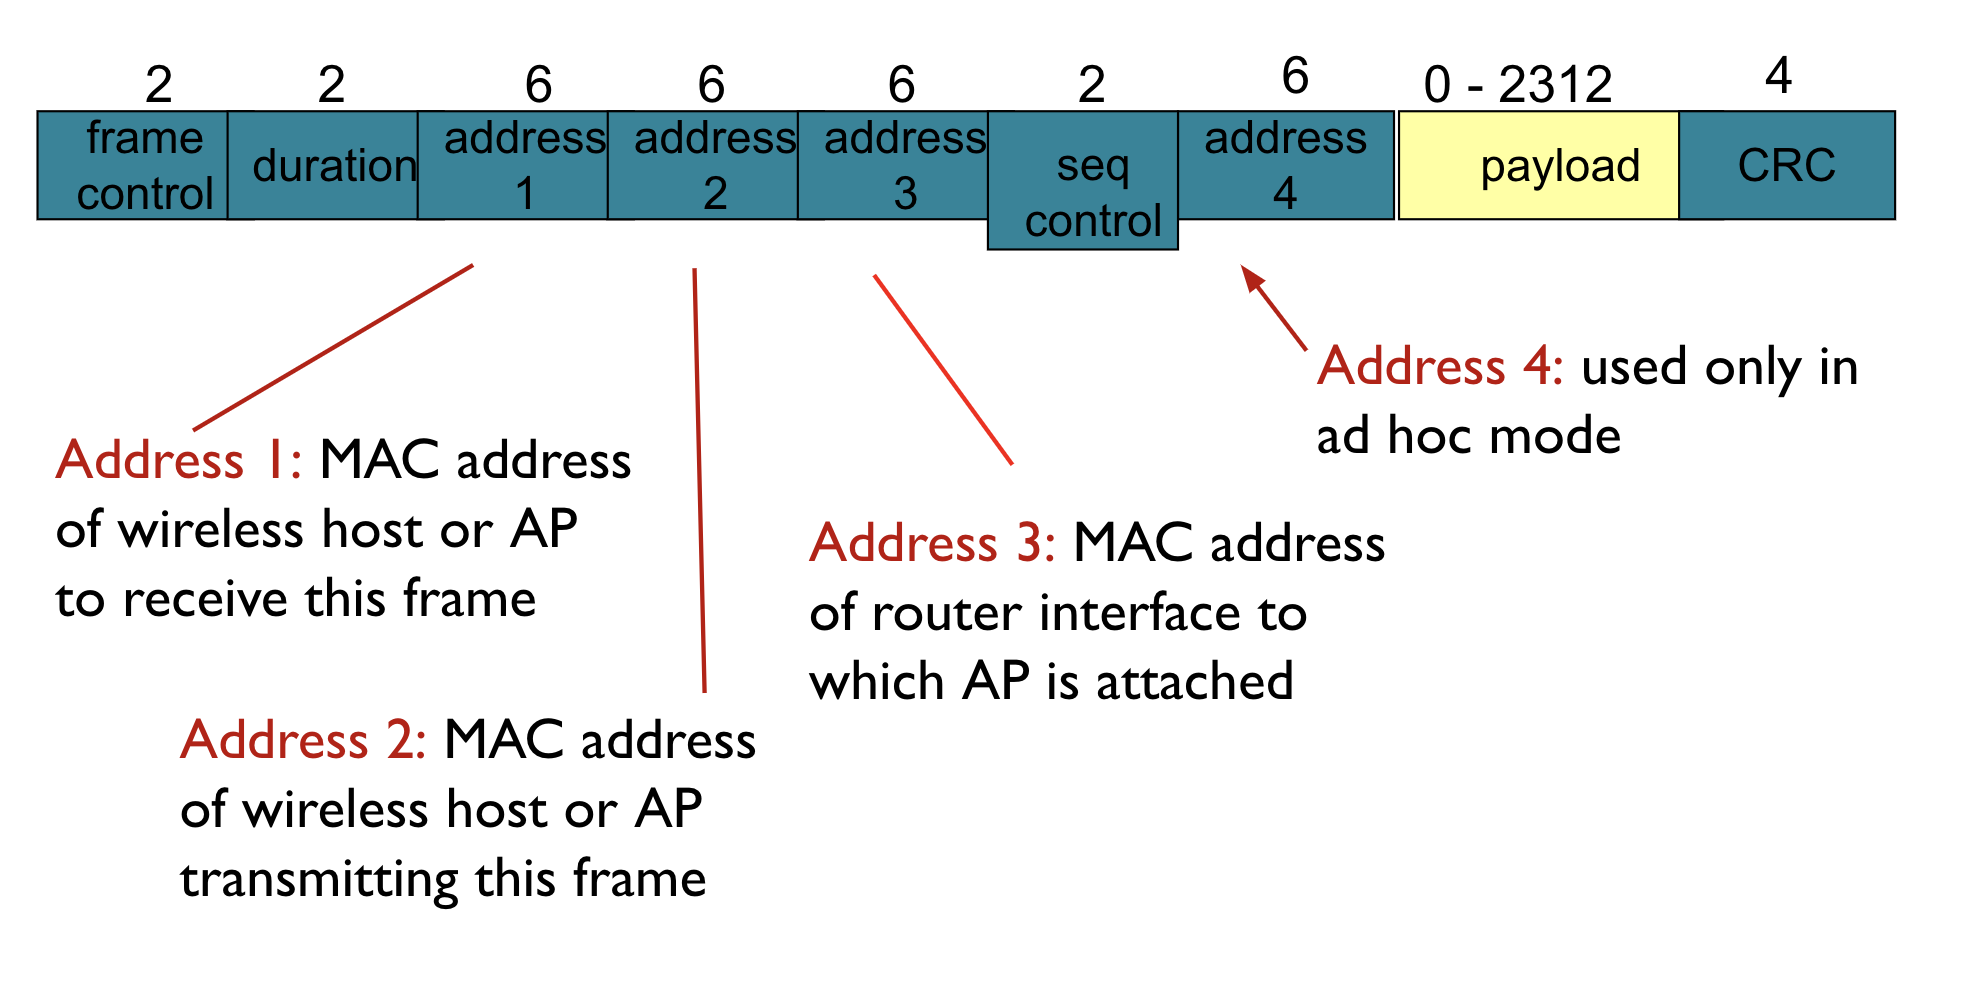

### Useful 802.11 Wireshark Display Filters

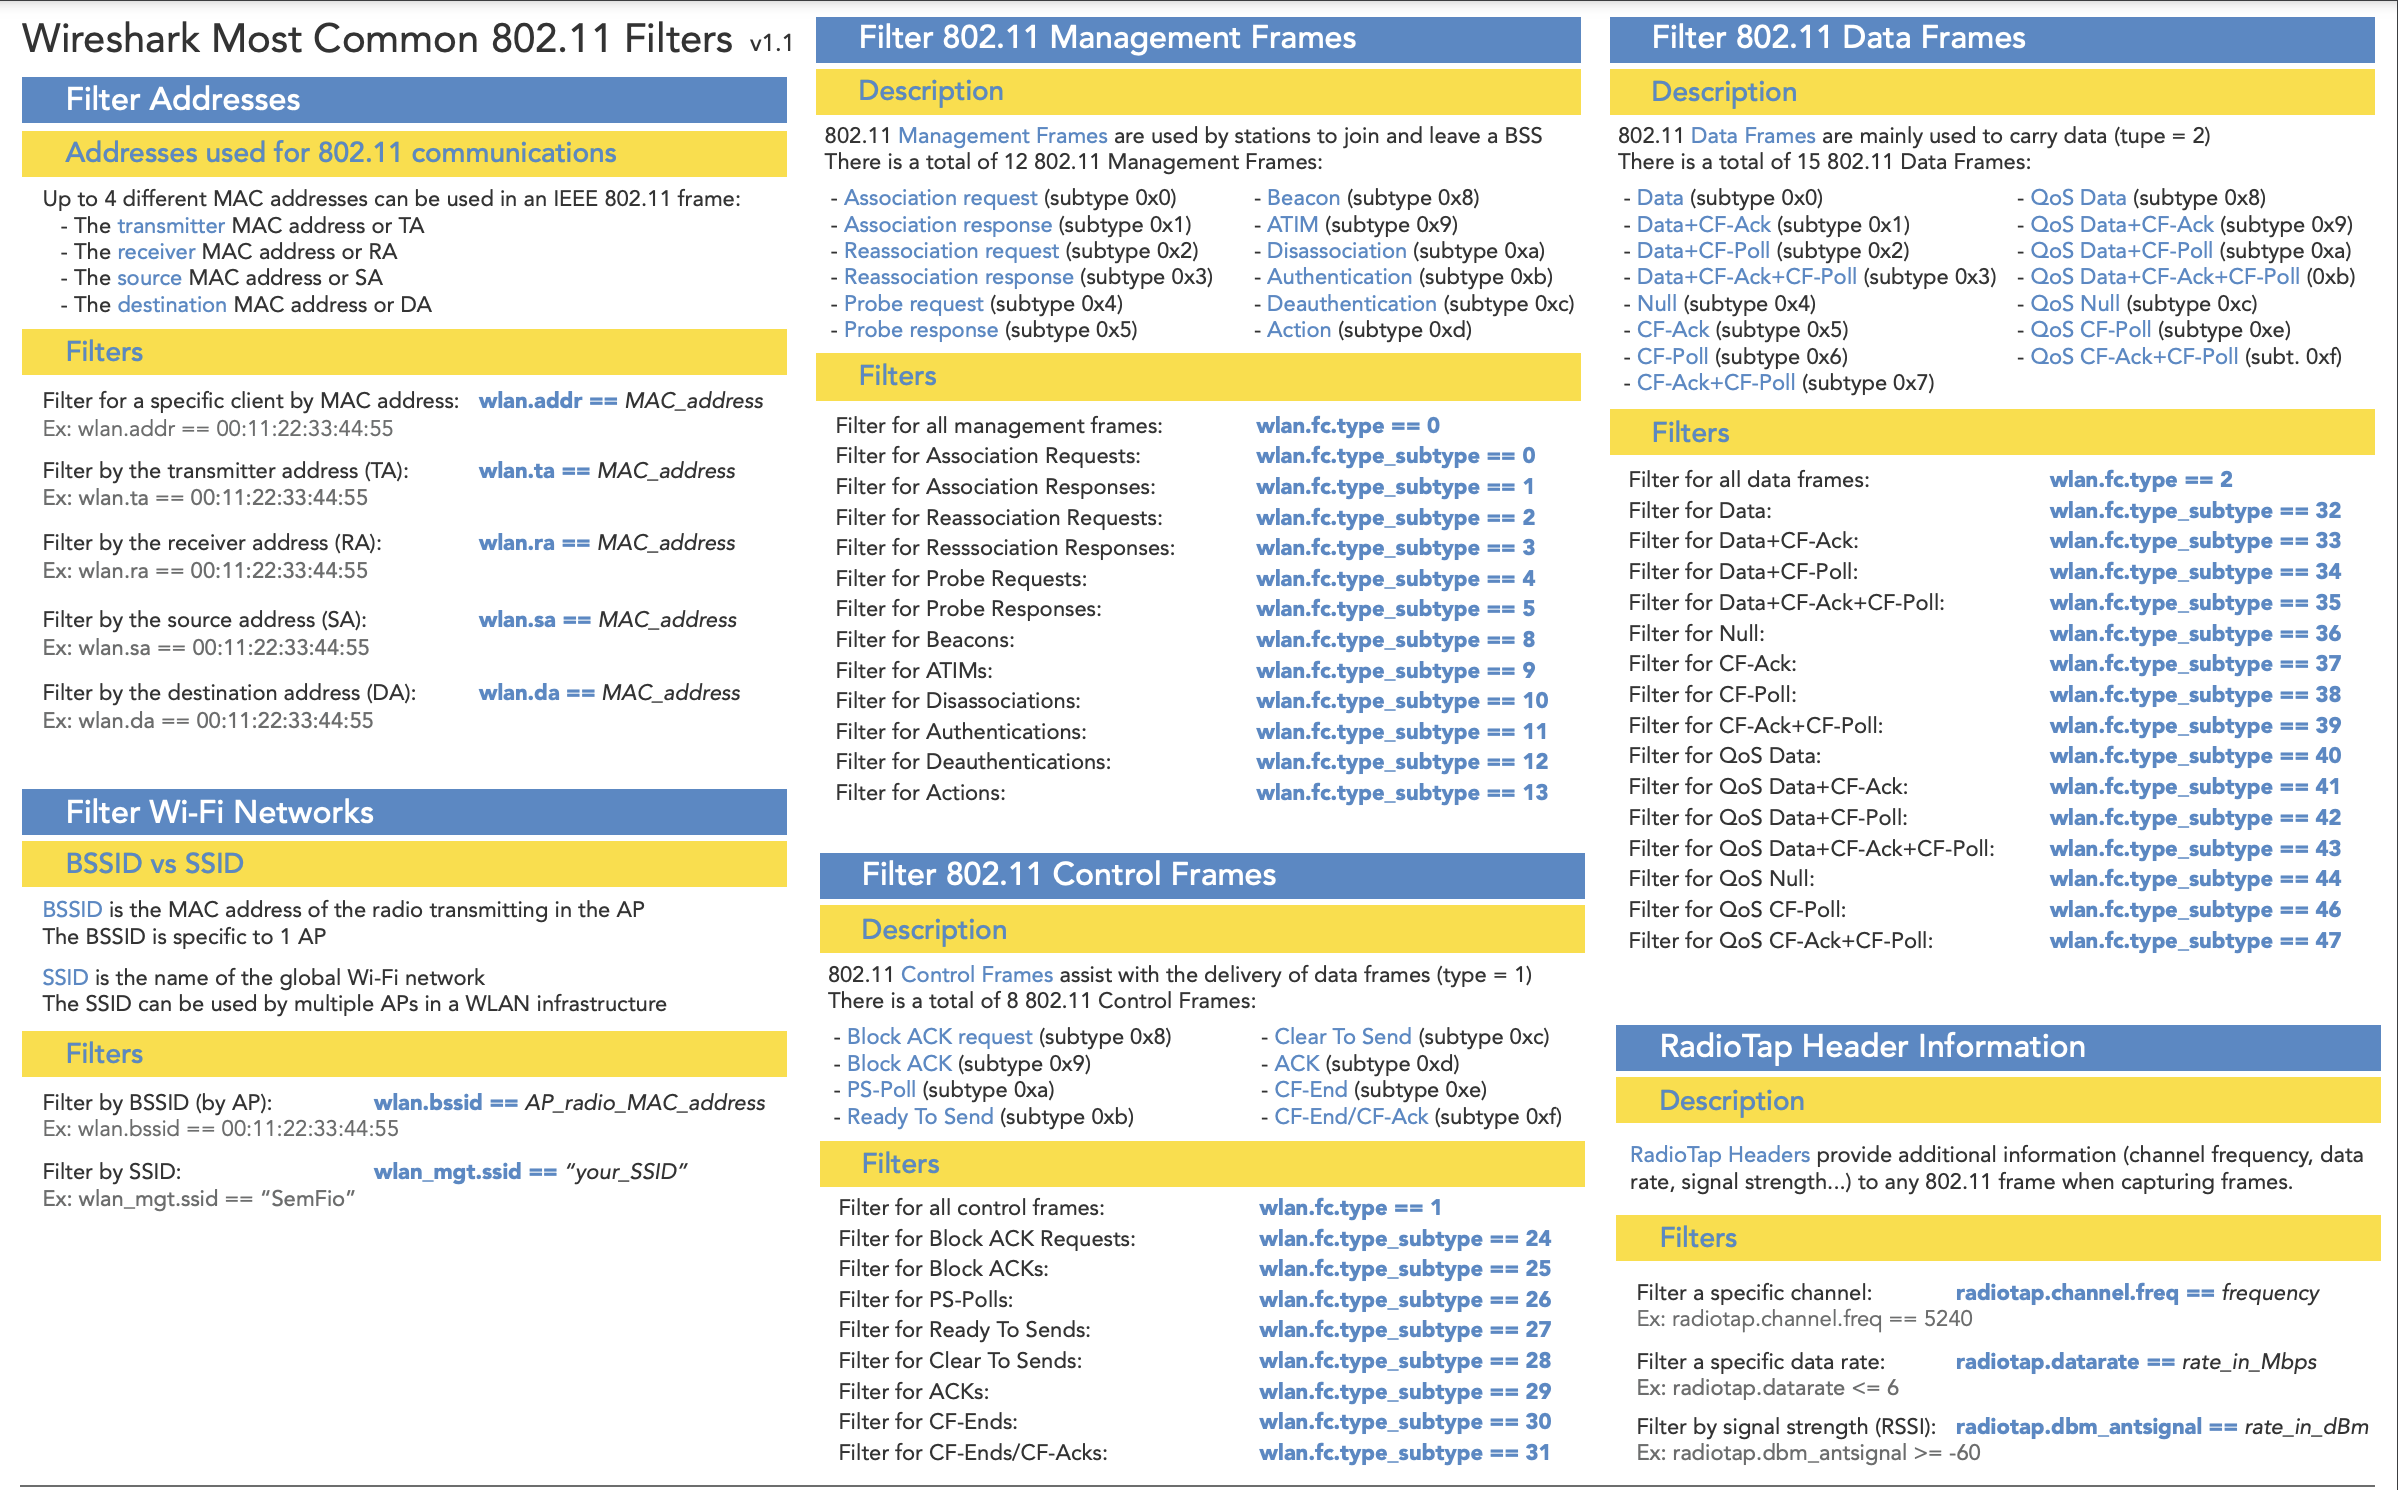

### Analyzing 802.11 Frames

Open up [wlan.pcap](https://drive.google.com/file/d/1r0qQn2qSwoOjKopOCLHjDh0w22CvsK-W/view?usp=drive_link). This capture was done in monitor mode on a separate device during an Ookla speedtest. Take a look at the different management / control / data frames that are sent and answer the following questions below.

- How many total packets are sniffed in monitor mode?
- How many management / control / data frames are present in the packet capture?
- How many probe requests are sent from the client?
- How many probe responses are sent from the AP to the client?
- What is the SSID of the network that the client is connected to?
- Why would the transmitter address always be equal to the source address?

In [ ]:
%load ./review3-answers.txt